# Test of Equivalence and Non-Inferiority

**Author: Dr. Rachita Halehalli**
<br>Data Scientist
<br>MMJS DataPhi


In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
#import statsmodels.stats.weightstats as smws
import statsmodels.stats.weightstats as ssw
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#read data from excel - 
#tost_dummy is dummy data created for demonstartion of test
# data has 3 columns - Category (values 1 and 2), numeric values in series 'A' and series 'B'
data=pd.read_excel('tost_dummy.xlsx')
data.columns
data['Category'].unique()

Index(['Category', 'A', 'B'], dtype='object')

array(['Category 1', 'Category 2'], dtype=object)

## T-Test and Two One-Sided Test for Category 1

T-Test Results
-----------------------------


Ttest_indResult(statistic=-11.348310146795367, pvalue=8.843413759951763e-25)


TOST Results
-----------------------------


(0.6235885568404105,
 (-0.31523083741098323, 0.6235885568404105, 278.0),
 (-27.89792911087194, 7.250657069066468e-83, 278.0))

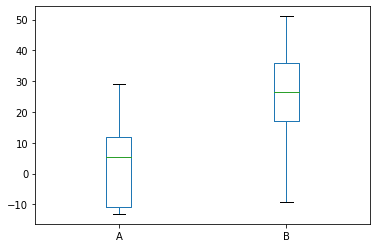

In [3]:
Category1 = data[data['Category']=='Category 1']
print('T-Test Results\n-----------------------------')
stats.ttest_ind(Category1.A, Category1.B)
print('\nTOST Results\n-----------------------------')
ssw.ttost_ind(Category1.A, Category1.B, low=-20, upp=30)
Category1.boxplot(column= ['A','B'],grid=False)

## T-Test and Two One-Sided Test for Category 2

T-Test Results
-----------------------------


Ttest_indResult(statistic=3.876723353771707, pvalue=0.0001369884219725474)


TOST Results
-----------------------------


(1.7085448135214322e-36,
 (16.449880176815082, 2.0027693281529245e-41, 238.0),
 (-14.983011880793356, 1.7085448135214322e-36, 238.0))

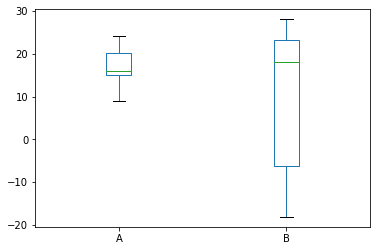

In [4]:
Category2 = data[data['Category']=='Category 2']
print('T-Test Results\n-----------------------------')
stats.ttest_ind(Category2.A, Category2.B)
print('\nTOST Results\n-----------------------------')
ssw.ttost_ind(Category2.A, Category2.B, low=-20, upp=30)
Category2.boxplot(column= ['A','B'],grid=False)

Interpreting results seems confusing. Let me make it more clear below.

### How to read results of TOST?

**null** hypothesis:  m1 - m2 < low or m1 - m2 > upp
<br> or *in other words if **p-value is greater than 0.05** difference between two samples is less than low (inferior) or greater than upper (superior)*

**alternative** hypothesis:  low < m1 - m2 < upp
<br> or *in other words **p-value is less than 0.05** difference between two samples is within lower and upper limits set for the hypothesis testing impliying equivalence.*

In [8]:
#Function to read TOST results (when higher values are better (to see increase in efficacy of vaccine))
#change statement when lower is better (Ex: reduction in churn rate)
def TOST(x,y,upp,low):
    res=ssw.ttost_ind(x,y,low=low,upp=upp)
    overall_p =res[0]
    lower_p =res[1][1]
    upper_p =res[2][1]
    
    if overall_p<0.05:
        return "A and B are Equivalent"
    elif overall_p >0.05 and lower_p<0.05:
        return "A and B are not-equivalent. p = " + str(overall_p) + ". B is inferior A. lower_p = "+str(lower_p)
    elif overall_p >0.05 and upper_p<0.05:
        return "A and B are not-equivalent. p = " + str(overall_p) + ". B is superior to A. upper_p = "+ str(upper_p)
    
print('Category 1: '+TOST(Category1.A,Category1.B,30,-20))
print('Category 2: '+TOST(Category2.A,Category2.B,30,-20))

Category 1: A and B are not-equivalent. p = 0.6235885568404105. B is superior to A. upper_p = 7.250657069066468e-83
Category 2: A and B are Equivalent


In [6]:
# Note to readers: while framing superior and inferior hypothesis test care must be taken to correctly frame null and alternative hypothesis (read blog(link) for more info)

### Hit **Star** if you like it. Feel free to share and comment!